<a href="https://colab.research.google.com/github/QuocAn1234/Le-Quoc-An-19146142/blob/main/LeQuocAnTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Lê Quốc An 19146142
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.layers import Activation,Dropout,Dense,Conv2D,AveragePooling2D,Flatten,ZeroPadding2D,MaxPooling2D
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import seaborn as sns
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import math
import cv2
import imageio
from os import listdir
import warnings
import filecmp
from PIL import Image
from keras.layers.convolutional import Conv2D

In [8]:
#KET NOI GOOGLE DRIVE
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/BANH',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
test_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/BANH',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 67 images belonging to 4 classes.
Found 67 images belonging to 4 classes.


In [14]:
#initialising the CNN
classifier = Sequential()
#step1 - Convolution
from keras.layers import Dense, Dropout
classifier.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
classifier.add(MaxPooling2D(pool_size =(2, 2)))
classifier.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation= 'relu',kernel_initializer = 'he_uniform'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 10, activation = 'softmax')) #Bao nhiêu người thì units = x bấy nhiêu

#Compiling the CNN
classifier.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/BANH',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
test_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/BANH',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')


Found 67 images belonging to 4 classes.
Found 67 images belonging to 4 classes.


In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint 
#callbacks = [EarlyStopping(monitor = 'val_loss', patience =100), ModelCheckpoint('model_checkpoint_new.h5', save_best_only True)] 
from tensorflow.keras.callbacks import EarlyStopping
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]

history=classifier.fit(training_set,
                  steps_per_epoch=len(training_set),
                  batch_size = 64,
                  epochs=100,
                  validation_data=test_set,
                  validation_steps=len(test_set),
                  callbacks=callbacks,
                  verbose = 1)

#đánh giá chất lượng của mô hình và vẽ lại
score = classifier.evaluate(test_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
print('Done Train')
classifier.save('classifer_Fruit.h5')
print('Done Save')

Epoch 1/100
3/3 [==============================] - 27s 11s/step - loss: 22.3372 - accuracy: 0.1343 - val_loss: 11.4703 - val_accuracy: 0.2537
Epoch 2/100
3/3 [==============================] - 10s 3s/step - loss: 5.9729 - accuracy: 0.3134 - val_loss: 1.2786 - val_accuracy: 0.2985
Epoch 3/100
3/3 [==============================] - 9s 4s/step - loss: 1.3594 - accuracy: 0.2687 - val_loss: 1.3754 - val_accuracy: 0.2985
Epoch 4/100
3/3 [==============================] - 9s 4s/step - loss: 1.3658 - accuracy: 0.3731 - val_loss: 1.2922 - val_accuracy: 0.3134
Epoch 5/100
3/3 [==============================] - 9s 3s/step - loss: 1.2387 - accuracy: 0.4030 - val_loss: 1.1413 - val_accuracy: 0.4925
Epoch 6/100
3/3 [==============================] - 9s 3s/step - loss: 1.0926 - accuracy: 0.4478 - val_loss: 1.3886 - val_accuracy: 0.2836
Epoch 7/100
3/3 [==============================] - 9s 4s/step - loss: 1.2375 - accuracy: 0.3284 - val_loss: 1.1934 - val_accuracy: 0.3881
Epoch 8/100
3/3 [============

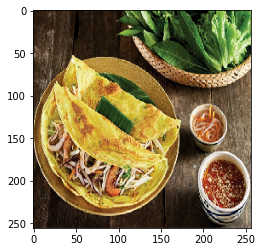

In [16]:
from tensorflow.keras.models import load_model
model=load_model('classifer_Fruit.h5')
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
test_img=load_img('/content/banh xeo test.jpg',target_size=(256,256))
plt.imshow(test_img)

banhxeo


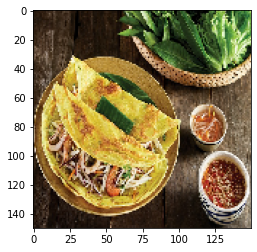

In [20]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
test_img=load_img('/content/banh xeo test.jpg',target_size=(150,150))
plt.imshow(test_img)
import numpy as np
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="banhdalon"
elif round(result[0][1])==1:
   prediction="banhhoi"
elif round(result[0][2])==1:
   prediction="banhuot"
elif round(result[0][3])==1:
   prediction="banhxeo"
print(prediction)

banhdalon


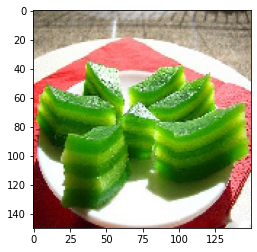

In [21]:
test_img=load_img('/content/banhheo test.jpg',target_size=(150,150))
plt.imshow(test_img)
import numpy as np
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="banhdalon"
elif round(result[0][1])==1:
   prediction="banhhoi"
elif round(result[0][2])==1:
   prediction="banhuot"
elif round(result[0][3])==1:
   prediction="banhxeo"
print(prediction)

banhuot


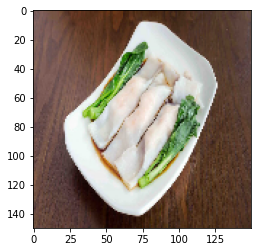

In [24]:
test_img=load_img('/content/banh uot.jpg',target_size=(150,150))
plt.imshow(test_img)
import numpy as np
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="banhdalon"
elif round(result[0][1])==1:
   prediction="banhhoi"
elif round(result[0][2])==1:
   prediction="banhuot"
elif round(result[0][3])==1:
   prediction="banhxeo"
print(prediction)


banhhoi


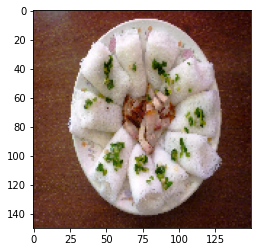

In [25]:
test_img=load_img('/content/banhhoi.jpg',target_size=(150,150))
plt.imshow(test_img)
import numpy as np
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="banhdalon"
elif round(result[0][1])==1:
   prediction="banhhoi"
elif round(result[0][2])==1:
   prediction="banhuot"
elif round(result[0][3])==1:
   prediction="banhxeo"
print(prediction)
